In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 79s 0us/step


In [ ]:
def build_cnn_from_scratch():
    model = tf.keras.Sequential([
        # Conv Layer 1
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Conv Layer 2
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Conv Layer 3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten and Dense Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # Output: 10 classes
    ])

    return model


In [ ]:
model = build_cnn_from_scratch()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
782/782 - 72s - 92ms/step - accuracy: 0.4239 - loss: 1.5677 - val_accuracy: 0.4780 - val_loss: 1.4243
Epoch 2/15
782/782 - 80s - 102ms/step - accuracy: 0.5737 - loss: 1.1964 - val_accuracy: 0.6063 - val_loss: 1.1098
Epoch 3/15
782/782 - 84s - 107ms/step - accuracy: 0.6417 - loss: 1.0254 - val_accuracy: 0.6539 - val_loss: 0.9908
Epoch 4/15
782/782 - 81s - 104ms/step - accuracy: 0.6794 - loss: 0.9199 - val_accuracy: 0.6779 - val_loss: 0.9292
Epoch 5/15
782/782 - 82s - 104ms/step - accuracy: 0.7096 - loss: 0.8339 - val_accuracy: 0.6862 - val_loss: 0.9235
Epoch 6/15
782/782 - 71s - 90ms/step - accuracy: 0.7300 - loss: 0.7719 - val_accuracy: 0.7048 - val_loss: 0.8635
Epoch 7/15
782/782 - 80s - 102ms/step - accuracy: 0.7520 - loss: 0.7121 - val_accuracy: 0.7053 - val_loss: 0.8611
Epoch 8/15
782/782 - 79s - 101ms/step - accuracy: 0.7678 - loss: 0.6631 - val_accuracy: 0.7089 - val_loss: 0.8538
Epoch 9/15
782/782 - 84s - 107ms/step - accuracy: 0.7865 - loss: 0.6152 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 4s - 14ms/step - accuracy: 0.7214 - loss: 0.9651

Test Accuracy: 0.7214
Test Loss: 0.9651


Filters shape: (3, 3, 3, 32)


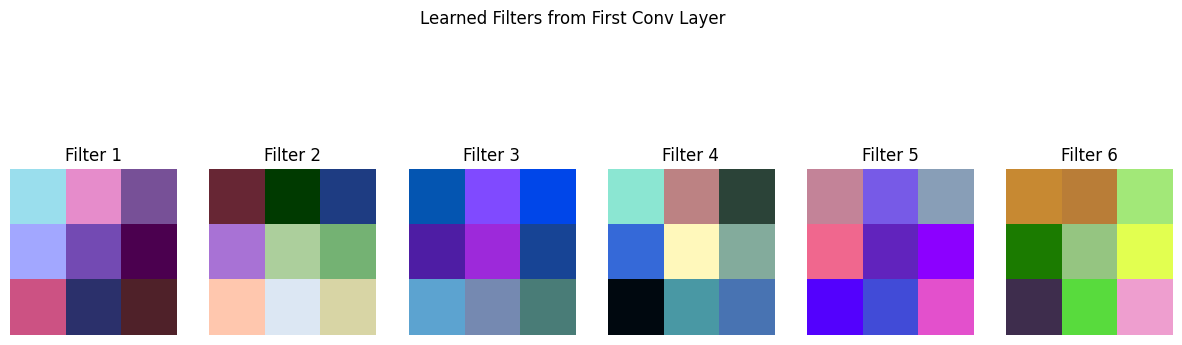

In [ ]:
# Extract the first Conv layer
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

print(f"Filters shape: {filters.shape}")  # (3, 3, 3, 32) → 32 filters of size 3x3x3

# Plot the first 6 filters
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

for i in range(6):
    # Normalize filter values to [0, 1] for display
    f_min, f_max = filters[:, :, :, i].min(), filters[:, :, :, i].max()
    filter_img = (filters[:, :, :, i] - f_min) / (f_max - f_min)

    axes[i].imshow(filter_img)
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')

plt.suptitle('Learned Filters from First Conv Layer')
plt.show()